# Houston, We Have an Optimization Problem
J. BENNETT, M. DAVIS, Z. MEYER, M. SHIELDS, L. TOLMAN

# Abstract

In this project we attempt to solve an intricate optimal control problem. We want to understand the optimal path (in a two-dimensional world) from a spaceship back to the international space station in a given amount of time. We try to do this in an optimal path where we minimize gas consumption. We also make this problem more complex by adding in asteroids that the spaceship must avoid. This traditionally would require inequality constraints, but we will utilize soft constraints instead. We run our solution first without asteroids and then make the problem more complex. We also animate our results to better understand and visualize the optimal path.

# Background/Motivation

Space travel has long fascinated humanity. In recent years, more and more space travel is occurring. Traveling in space present many different and unique challenges. In our project, we attempt to better understand optimal paths for traveling in space. While we do simplify the problem in many ways (making it two dimensional, ignoring gravity, etc.) we still can learn a lot from optimal paths in our problem. We set up a problem where our spaceship is located at the origin in a two-dimensional world. We then try and find the optimal path back to the space station placed at (1,1). In our most simplified model, we do not have any asteroids in the way. In space where there is no air resistance, once you are traveling a certain velocity you continue to travel at that velocity. This means we can minimize gas consumption by minimizing the acceleration in the x and y direction. This will give us our optimal path. In our first model, with no asteroids in the way, this should result in a straight path back to the space station.

After getting this model to work, we complicate our model by adding asteroids. To avoid an asteroid, we could use inequality constraints with KKT conditions. However, due to the complexities of KKT conditions in optimal control, we can also handle this constraint as a soft constraint. This can be done by adding the constraint into the cost functional. This essentially adds a cost to our functional when the spaceship is too close to the asteroid. We want this cost to vanish quickly when the spaceship is away from the asteroid, so it does not take a very suboptimal path. We also do not want this cost to vanish so quickly that the spaceship gets arbitrarily close to the asteroid. By adding this constraint to our cost functional, when we minimize our cost functional, we will minimize gas consumption and avoid the asteroids. After our first model, we will add an asteroid and find the optimal path. Then we will continue to add asteroids to see how our path changes. Finally, we will make the asteroids move instead of being stationary. 

In all of our models besides the last where we have the nonstationary asteroids, we use the following cost functional and state space.


INSERT COST FUNCTIONAL AND STATE SPACE

We use the cost functional defined above. In this cost functional u_x and u_y represent acceleration in the x and y direction. In the summation, n represent the number of asteroids. So, if we do not have any asteroids the summation does not exist. In the summation part of the cost functional Wi is the weight of the ith asteroid (the cost of getting too close or hitting the asteroid) and c_xi, c_yi, and r_i define the center and radius of the ith asteroid. With our cost functional and state space defined we can use Pontryagin’s Maximum Principle to find our costate evolution. 

INSERT PMP 

Now we have everything we need to solve our optimization problem besides our boundary conditions. Based on the setup of our problem we use the following boundary conditions.

INSERT BOUNDARY CONDITIONS

This ensures that our spaceship is starting at the origin and travels to the space station. We are also assuming that our spaceship could have been moving with initial velocities of v_x and v_y in the x and y direction before we begin our optimization problem. We force our spaceship to stop moving once it arrives at the space station.


This gives us everything we need to solve for our optimal path. We will showcase several different situations and amounts of asteroids in the following models. When we adjust the asteroids so that they are moving, we change the cost functional to the following form.

INSERT NEW COST FUNCTIONAL

The only difference in this cost functional is now the asteroids center is a function of time. 

# Models

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_bvp
import matplotlib.image as mpimg
from scipy.ndimage import rotate

We will use the above packages in our models while solving for the optimal path of the spaceship.

### Model 1

In [4]:
def prob1():
    t0 = 0
    tf = 1


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        return np.array([xp, yp, p2, p3, zeros, zeros, -p0, -p1])
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3],yb[0]-1,yb[1]-1,yb[2],yb[3]])

    #set the intial conditions and yo
    t_steps = 200
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    
    y0 = np.ones((8,t_steps))
    # p0 = np.array([1,1])
    # Solve the system.
    
    sol = solve_bvp(ode, bc, t, y0)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model 1')
    plt.show()


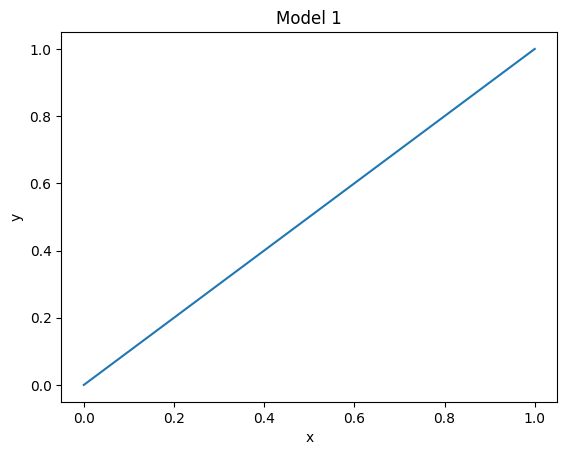

In [5]:
prob1()

INSERT ANIMATION

### Model 2

INSERT THE REST OF THE MODELS EACH WITH MINI EXPLINATION

# Results/Analysis

Brief summary of the results

# Ethical Considerations

Breif summary of ethics

# Conclusion

Wrap up everything

# References

References